In [1]:
!pip install matplotlib

import os
import time
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Mounted at /content/drive/


All files found and are not empty. Proceeding with comparison.


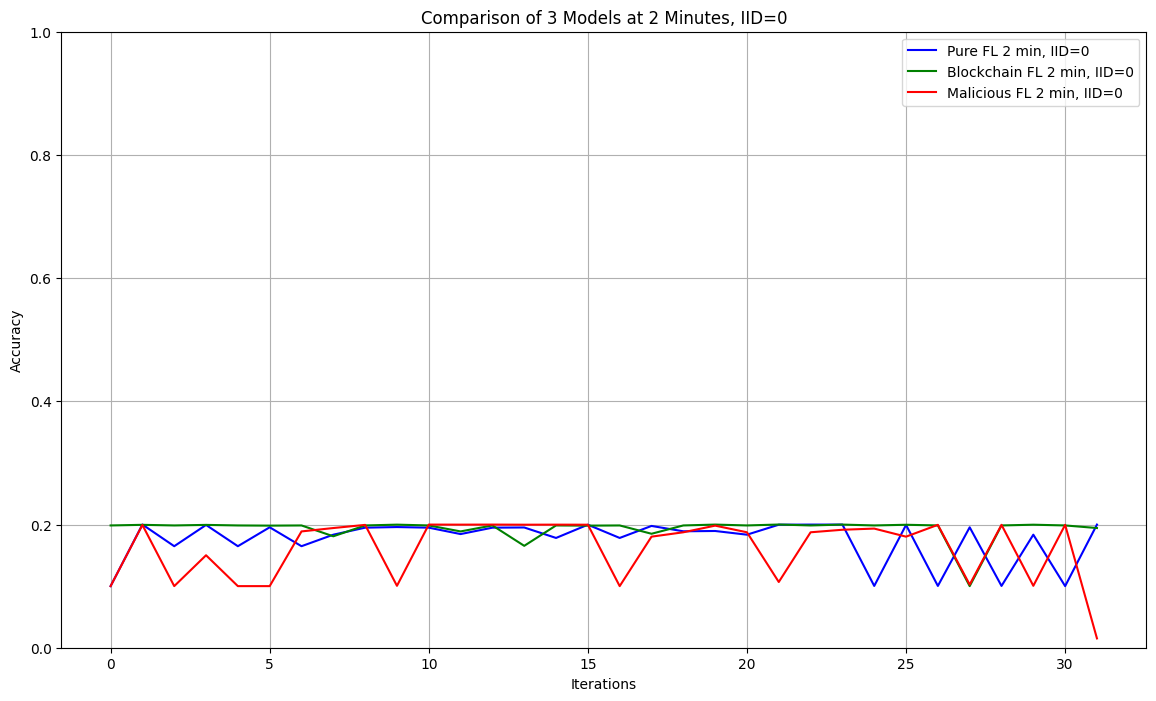

All files found and are not empty. Proceeding with comparison.


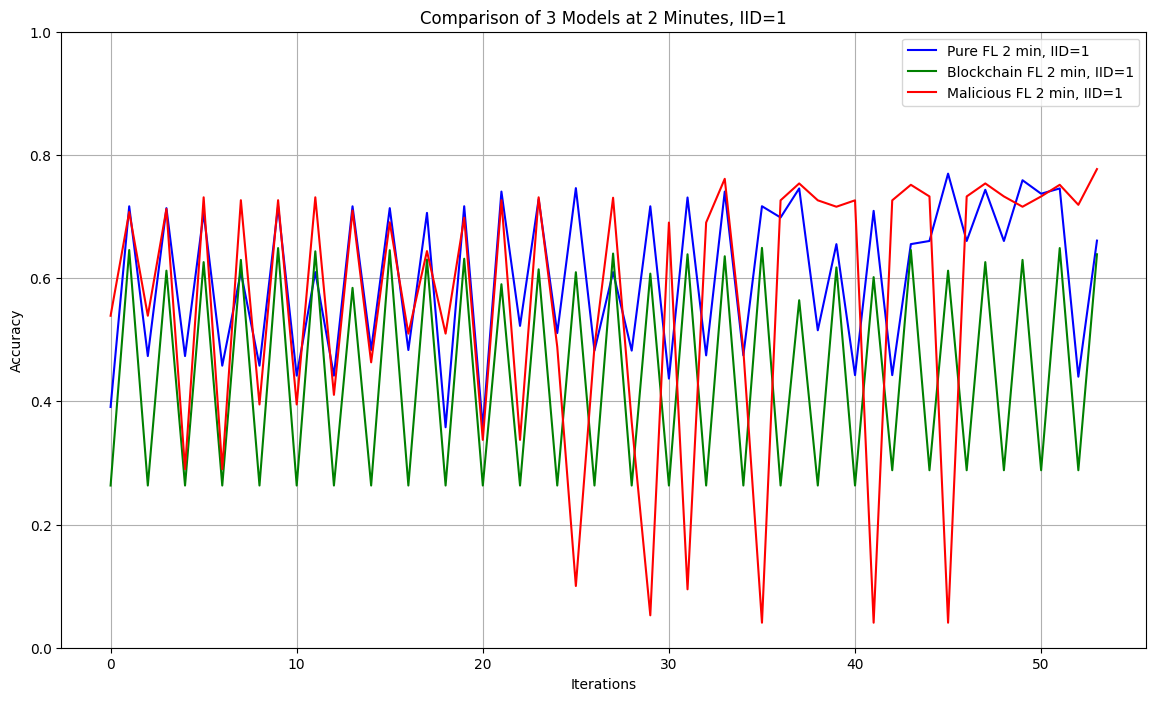

All files found and are not empty. Proceeding with comparison.


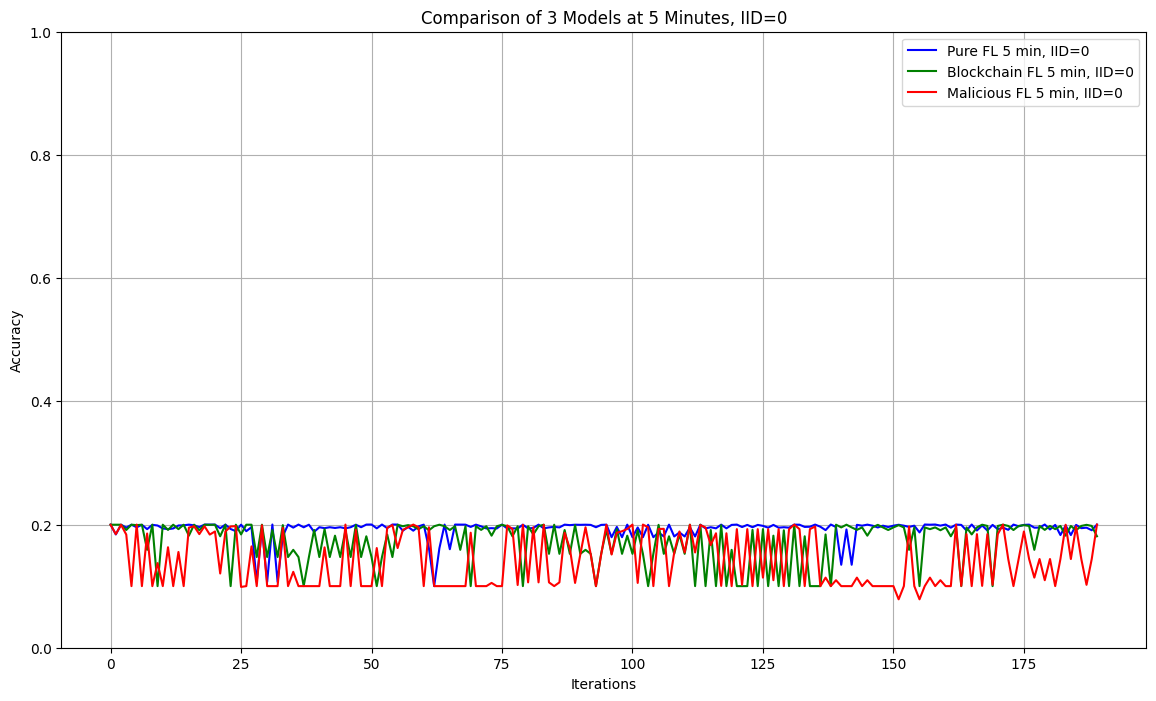

All files found and are not empty. Proceeding with comparison.


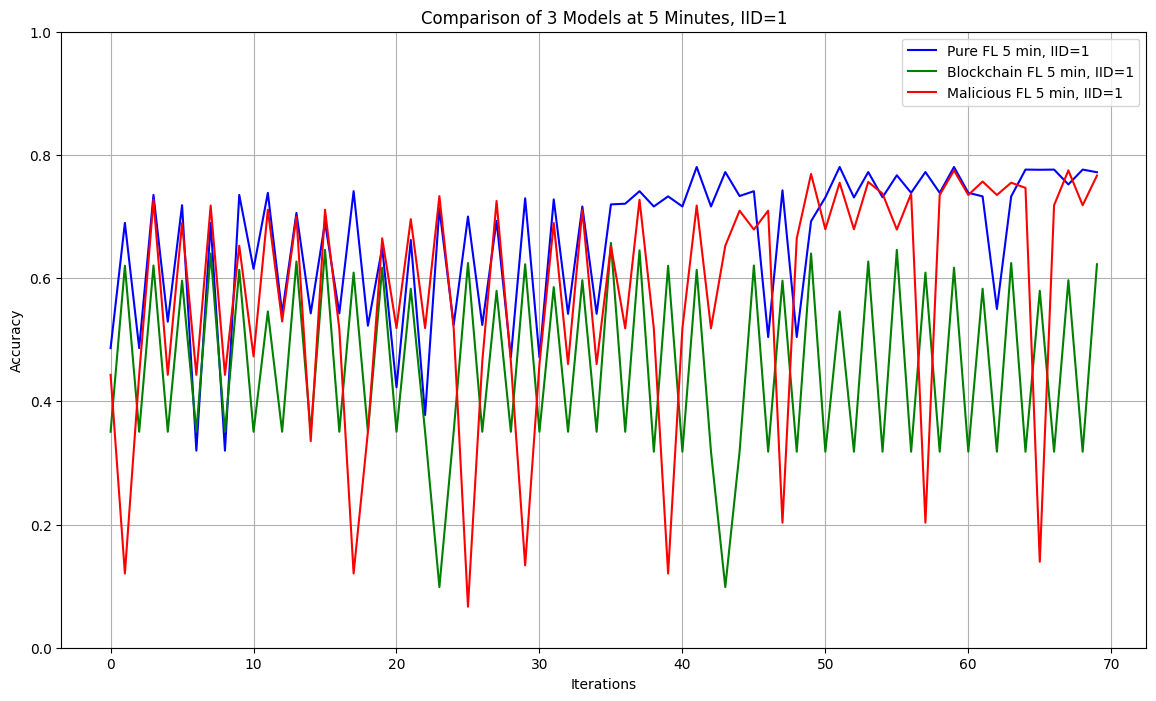

In [6]:
# Define colors for each model
colors = {'Pure': 'blue', 'Blockchain': 'green', 'Malicious': 'red'}

# IID values to compare
iid_values = ['0', '1']  # Non-IID and IID

# Time marks to compare
time_marks = ['2', '5']

# Function to generate the file paths dynamically
def generate_file_paths(time_mark, iid):
    return {
        model: os.path.join(vbflshare, f'{model}{time_mark}_iid{iid}.txt')
        for model in colors
    }

# Function to check for file existence and that they are not empty
def check_files_exist(file_paths):
    for file_path in file_paths:
        if not os.path.isfile(file_path):
            print(f"File not found: {file_path}")
            return False
        if not os.path.getsize(file_path) > 0:
            print(f"File is empty: {file_path}")
            return False
    return True

# Function to wait for all files to be available and non-empty
def wait_for_files(file_paths):
    while not check_files_exist(file_paths):
        print(f"Waiting for files to be available and non-empty in the shared folder...")
        time.sleep(60)  # Check every 60 seconds
    print("All files found and are not empty. Proceeding with comparison.")

# Function to read data from the output files and extract accuracies
def read_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line or "validator updated model accuracy" in line:
            parts = line.split('-')
            if len(parts) == 2:
                try:
                    accuracy = float(parts[1].strip())
                    accuracies.append(accuracy)
                except ValueError as e:
                    print(f"Error parsing line '{line}': {e}")
    return accuracies

# Function to plot accuracies for both full and shortest length
def plot_accuracies(file_paths, colors, time_mark, iid):
    data = {}
    # Read data from each file and store it
    for model_name, file_path in file_paths.items():
        data[model_name] = read_data(file_path)
    # Find the shortest length of accuracies
    min_length = min(len(acc) for acc in data.values())
    # Plot shortest length iterations for each model
    plt.figure(figsize=(14, 8))
    for model_name, accuracies in data.items():
        label_name = f'{model_name.capitalize()} FL {time_mark} min, IID={iid}'
        plt.plot(range(min_length), accuracies[:min_length], label=label_name, color=colors[model_name])
    plt.title(f'Comparison of 3 Models at {time_mark} Minutes, IID={iid}')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Loop through each combination of time marks and IID values
for time_mark in time_marks:
    for iid in iid_values:
        # Generate file paths for the current combination
        file_paths = generate_file_paths(time_mark, iid)
        # Wait for the files to be ready
        wait_for_files(list(file_paths.values()))
        # Plot the accuracies
        plot_accuracies(file_paths, colors, time_mark, iid)